In [1]:
'''
Note that in topic similarity metric proposed, topics are compared in the same order that appear in the excel/google spread sheet

According to PreparedData[topic(id)], with id = 1,2..3....n
'''

'\nNote that in topic similarity metric proposed, topics are compared in the same order that appear in the excel/google spread sheet\n\nAccording to PreparedData[topic(id)], with id = 1,2..3....n\n'

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

In [3]:

import gensim, pickle
from gensim.models.keyedvectors import KeyedVectors
LdaModel = gensim.models.ldamodel.LdaModel


In [14]:
import pandas as pd
import textwrap
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Load word embedding

In [18]:
#ruta_word_embedding = '../data/wiki.multi.en.vec'
#ruta_word_embedding = '../data/embedding_english__europe_northamerica_word2vec_300dimensions_cbow_trim3_epoch50.bin'
ruta_word_embedding = '../data/embedding_english_europe_northamerica_word2vec_300dimensions_cbow_trim3_epoch50.model'
wordembedding = gensim.models.Word2Vec.load(ruta_word_embedding)
#wordembedding = KeyedVectors.load_word2vec_format(ruta_word_embedding, binary=False)
#wordembedding = KeyedVectors.load_word2vec_format(ruta_word_embedding, binary=True)

### Load topic modelings

In [19]:
"""
Note: 
LDAvis Scenario:
If you wish to calculate topic similarity metric over one topic modeling output, therefore lda_model_collection_1
and lda_model_collection_2 should be the same. 

Sankey diagram scenario:
If you wish to calculate topic similarity metric over two different topic modeling outputs, lda_model_collection_1
and lda_model_collection_2 should be different


The same shouuld be done with the most relevant documents.
"""



lda_model_collecion_1 = LdaModel.load("../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411.csv_gensim.model")
#lda_model_collecion_2 = LdaModel.load("../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411.csv_gensim.model")
lda_model_collecion_2 = LdaModel.load("../data/cambridge_analytica/regional_datasets/files_northamerica/english_northamerica_tweets_20190411.csv_gensim.model")

In [20]:
lda_model_collecion_1.show_topics()

[(10,
  '0.051*"good" + 0.037*"read" + 0.036*"make" + 0.026*"great" + 0.021*"interesting" + 0.016*"real" + 0.016*"article" + 0.015*"happen" + 0.014*"lot" + 0.014*"point"'),
 (9,
  '0.043*"social" + 0.041*"medium" + 0.035*"news" + 0.031*"thing" + 0.023*"people" + 0.020*"platform" + 0.019*"stop" + 0.019*"give" + 0.019*"internet" + 0.019*"bad"'),
 (5,
  '0.045*"question" + 0.034*"today" + 0.026*"watch" + 0.024*"time" + 0.022*"talk" + 0.021*"week" + 0.020*"answer" + 0.018*"open" + 0.017*"hear" + 0.016*"day"'),
 (6,
  '0.131*"bigdata" + 0.039*"late" + 0.034*"ai" + 0.033*"analytic" + 0.030*"machinelearne" + 0.030*"technology" + 0.022*"marketing" + 0.020*"tech" + 0.020*"datascience" + 0.017*"learn"'),
 (0,
  '0.055*"people" + 0.035*"delete" + 0.032*"year" + 0.026*"account" + 0.022*"friend" + 0.021*"time" + 0.017*"back" + 0.014*"message" + 0.014*"deletefacebook" + 0.014*"call"'),
 (7,
  '0.049*"facebook" + 0.047*"scandal" + 0.033*"company" + 0.032*"change" + 0.029*"make" + 0.027*"data" + 0.016

In [21]:
lda_model_collecion_2.show_topics()

[(7,
  '0.093*"people" + 0.032*"news" + 0.024*"lie" + 0.018*"story" + 0.017*"fake" + 0.015*"care" + 0.015*"report" + 0.014*"fact" + 0.013*"real" + 0.013*"world"'),
 (3,
  '0.035*"amp" + 0.021*"leave" + 0.020*"love" + 0.019*"free" + 0.019*"conservative" + 0.017*"call" + 0.015*"group" + 0.015*"hate" + 0.015*"stop" + 0.011*"woman"'),
 (5,
  '0.082*"make" + 0.047*"good" + 0.038*"thing" + 0.030*"read" + 0.025*"bad" + 0.024*"great" + 0.024*"time" + 0.017*"feel" + 0.017*"problem" + 0.017*"answer"'),
 (9,
  '0.137*"trump" + 0.018*"retweete" + 0.016*"family" + 0.015*"call" + 0.013*"child" + 0.012*"break" + 0.012*"president" + 0.011*"supporter" + 0.011*"policy" + 0.011*"end"'),
 (4,
  '0.181*"datum" + 0.073*"user" + 0.044*"give" + 0.039*"company" + 0.034*"data" + 0.028*"information" + 0.027*"sell" + 0.027*"share" + 0.025*"personal" + 0.019*"access"'),
 (0,
  '0.070*"facebook" + 0.041*"delete" + 0.036*"year" + 0.032*"post" + 0.031*"twitter" + 0.031*"account" + 0.030*"friend" + 0.025*"page" + 0.02

### Load relevant documents

In [22]:
with open('../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411.csvsent_topics_sorteddf_mallet_ldamodel', 'rb') as f:
    most_relevant_documents_collection_1 = pickle.load(f)
most_relevant_documents_collection_1 = most_relevant_documents_collection_1[['Topic_Num','Topic_Perc_Contrib','text']]

# ../data/cambridge_analytica/regional_datasets/files_northamerica/english_northamerica_tweets_20190411.csvsent_topics_sorteddf_mallet_ldamodel
with open('../data/cambridge_analytica/regional_datasets/files_northamerica/english_northamerica_tweets_20190411.csvsent_topics_sorteddf_mallet_ldamodel', 'rb') as f:
    most_relevant_documents_collection_2 = pickle.load(f)
most_relevant_documents_collection_2 = most_relevant_documents_collection_2[['Topic_Num','Topic_Perc_Contrib','text']]


In [23]:
most_relevant_documents_collection_1.head()

,Topic_Num,Topic_Perc_Contrib,text
0,0.0,0.2802,.\n#NYCACC\n#DogsOfTwitter\nROCKY\n#ATTENTION\...
1,0.0,0.2776,#NYCACC\n#DogsOfTwitter\nCAPONE #VID\n#ATTENTI...
2,0.0,0.2730,<usernameremoved> I can't wait for the followi...
3,0.0,0.2689,.\n#NYCACC\n#DogsOfTwitter\nATLAS #VID\n#ATTEN...
4,0.0,0.2672,Apparently all my friends are talking about me...


In [24]:
len(most_relevant_documents_collection_1)

1246

In [25]:
most_relevant_documents_collection_2.head()

,Topic_Num,Topic_Perc_Contrib,text
0,0.0,0.2848,Years it took for each product to reach 50 mil...
1,0.0,0.2672,<usernameremoved> My Facebook privacy are set ...
2,0.0,0.2662,"Hi Jay,\n\nWe have received a request to perma..."
3,0.0,0.2642,PSA!! In case you still have a Facebook page a...
4,0.0,0.2619,"Facebook, delete his text message thread and a..."


In [26]:
len(most_relevant_documents_collection_2)

1110

### Get prepared data from each collection

In [27]:

with open('../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411_prepared_data_dict_with_more_info', 'rb') as f:
    PreparedData_dict_with_more_info_collection_1 = pickle.load(f)
topic_order_1 = PreparedData_dict_with_more_info_collection_1['topic.order']

In [28]:
PreparedData_dict_with_more_info_collection_1.keys()

dict_keys(['mdsDat', 'tinfo', 'token.table', 'R', 'lambda.step', 'plot.opts', 'topic.order'])

In [29]:
PreparedData_dict_with_more_info_collection_1['mdsDat']

{'x': [0.06561997262644692,
  -0.28382506283890535,
  -0.289401674780925,
  0.21272859106268174,
  0.14102093243196315,
  0.1100277400167304,
  -0.11840074227359862,
  0.0961548131776081,
  -0.022263868897948243,
  0.13520202306311363,
  -0.04686272358716678],
 'y': [0.1128898003397685,
  -0.09882663335825936,
  0.004129310220773565,
  -0.09558681479188345,
  -0.12607354807849241,
  0.12020526372784264,
  -0.1473457220564188,
  -0.017721932508940032,
  -0.08350237935090149,
  -0.06275473678850552,
  0.39458739264501597],
 'topics': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'cluster': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Freq': [9.276300185810001,
  9.145722055493659,
  9.12672005300048,
  9.103953687112721,
  9.084135700940731,
  9.07681839621726,
  9.070171684665636,
  9.052063608257335,
  9.051452269710127,
  9.00923595607245,
  9.003426402719588]}

In [30]:
topic_order_1

[2, 3, 4, 1, 10, 9, 8, 11, 5, 6, 7]

In [31]:

with open('../data/cambridge_analytica/regional_datasets/files_northamerica/english_northamerica_tweets_20190411_prepared_data_dict_with_more_info', 'rb') as f:
    PreparedData_dict_with_more_info_collection_2 = pickle.load(f)
topic_order_2 = PreparedData_dict_with_more_info_collection_2['topic.order']

In [32]:
topic_order_2

[5, 10, 9, 7, 3, 1, 4, 8, 6, 2, 11]

In [33]:
PreparedData_dict_with_more_info_collection_2['mdsDat']

{'x': [-0.23384369680887063,
  0.09888022080378676,
  0.01815146775384666,
  -0.21883632638342435,
  -0.13228034788889512,
  -0.18170670614139287,
  0.16221116643274297,
  0.21507364140349247,
  0.10874141697675078,
  0.1872870228377705,
  -0.023677858985807633],
 'y': [-0.11394220097098683,
  -0.23341837336744806,
  -0.10116665335037166,
  -0.0973318679344067,
  0.08519871317897548,
  0.08630146103997087,
  -0.12247451719647967,
  -0.11829713975473048,
  0.1836989945817953,
  0.18710724300857115,
  0.2443243407651097],
 'topics': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'cluster': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Freq': [9.171938589488184,
  9.147267037286746,
  9.13675077344154,
  9.124719292313728,
  9.114893512011903,
  9.086133505521921,
  9.085146799390763,
  9.084022402169554,
  9.05698756012466,
  9.026365842843804,
  8.965774685407219]}

### Add relevance column to each dataframe

In [34]:
relevance_lambda = 0.6 #according to a user study, this is the best value. We can change this!!!


tinfo_collection_1 = pd.DataFrame.from_dict(PreparedData_dict_with_more_info_collection_1['tinfo'])
tinfo_collection_1['relevance'] = relevance_lambda * tinfo_collection_1['logprob']+ (1.00-relevance_lambda)*tinfo_collection_1['loglift']

tinfo_collection_2 = pd.DataFrame.from_dict(PreparedData_dict_with_more_info_collection_2['tinfo'])
tinfo_collection_2['relevance'] = relevance_lambda * tinfo_collection_2['logprob']+ (1.00-relevance_lambda)*tinfo_collection_2['loglift']

In [35]:
tinfo_collection_1.head()

,Category,Freq,Term,Total,loglift,logprob,relevance
0,Default,19023.0,datum,19023.0,30.0,30.0,30.0
1,Default,10705.0,bigdata,10705.0,29.0,29.0,29.0
2,Default,8660.0,privacy,8660.0,28.0,28.0,28.0
3,Default,9296.0,facebook,9296.0,27.0,27.0,27.0
4,Default,6147.0,user,6147.0,26.0,26.0,26.0


In [36]:
tinfo_collection_2.head()

,Category,Freq,Term,Total,loglift,logprob,relevance
0,Default,46443.0,datum,46443.0,30.0,30.0,30.0
1,Default,34999.0,trump,34999.0,29.0,29.0,29.0
2,Default,27062.0,privacy,27062.0,28.0,28.0,28.0
3,Default,25097.0,people,25097.0,27.0,27.0,27.0
4,Default,20775.0,make,20775.0,26.0,26.0,26.0


In [37]:
# how get terms order by relevance
'''
topic_id = 0
tinfo_collection_1.loc[tinfo_collection_1['Category'] == 'Topic'+str(topic_id+1)].sort_values(by='relevance', ascending=False)[['Term','relevance']][:n_terms]
''';

### Topic similarity metric

In [38]:
import unidecode
import spacy

from string import punctuation
from gensim.utils import simple_preprocess
from string import digits
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

nlp = spacy.load('en', disable=['parser', 'ner'])
stop_words = stopwords.words('english')


In [39]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [40]:
'''My own tokenizer '''

punctuation+="¡¿<>'`"
punctuation+='"'

#Remove digits and puntuaction
remove_digits = str.maketrans(digits, ' '*len(digits))#remove_digits = str.maketrans('', '', digits)
remove_punctuation = str.maketrans(punctuation, ' '*len(punctuation))#remove_punctuation = str.maketrans('', '', punctuation)
remove_hashtags_caracter = str.maketrans('#', ' '*len('#'))
#las palabras de los hashtag se mantiene, pero no el simbolo. 

tknzr = TweetTokenizer()
def sent_to_words(sentence):
    return tknzr.tokenize(sentence)
    
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    doc = nlp(" ".join(texts)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
        
def text_cleaner(tweet):
    tweet = tweet.translate(remove_digits)
    #tweet = tweet.lower() it wasn't a good idea,, we lost a lot of
    tweet = tweet.translate(remove_punctuation)
    tweet = tweet.translate(remove_hashtags_caracter)
    tweet = tweet.lower()
    tweet = unidecode.unidecode(tweet)
    tweet = sent_to_words(tweet)
    tweet = remove_stopwords(tweet)
    new_tweet  = []
    for elem in tweet:
        if len(elem)>0:
            new_tweet.append(elem[0])
    tweet = lemmatization(new_tweet, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    return tweet[0]




In [45]:
#Note, that vectors are going to be calculated according to topic order of PreparedData

def get_dicts_relevant_keywords_documents(lda_model,df_relevant_documents, n_terms, topic_order, PreparedData_dict_with_more_info):
    num_topics = lda_model.num_topics
    #create dictionary of top keywords 
    topKeywordsDict = {}
    for topic_id in range(num_topics):
        
        topKeywordsDict[topic_id] = []
        
        def save_relevant_keywords_in_dict(row):
            topKeywordsDict[topic_id].append({  #el topic_id, debe ser segun el orden de lda_model
                "term":row['Term'],
                "relevance":row['relevance']
            })
            
        topic_on_tinfo = topic_order.index(topic_id+1)+1    
        """
        Print the most relevant keywords.... Thus get an idea about how the topics are being processed (ordering)
        
        
        
        """
        print("get dicts relevant keywords", PreparedData_dict_with_more_info.loc[PreparedData_dict_with_more_info['Category'] == 'Topic'+str(topic_on_tinfo)].sort_values(by='relevance', ascending=False)['Term'][:5])
        PreparedData_dict_with_more_info.loc[PreparedData_dict_with_more_info['Category'] == 'Topic'+str(topic_on_tinfo)].sort_values(by='relevance', ascending=False)[['Term','relevance']][:n_terms].apply(save_relevant_keywords_in_dict, axis=1)    
    
    
        
            
    #create dictionary of relevant documents
    relevantDocumentsDict = {}
    
    def save_relevant_documents_in_dict(row):
        topic_id = int(row['Topic_Num'])
        if topic_id not in relevantDocumentsDict:
            relevantDocumentsDict[topic_id]=[]
        relevantDocumentsDict[topic_id].append({
            'topic_perc_contrib':row['Topic_Perc_Contrib'],
            'text':row['text']
        })
        return None
    
    df_relevant_documents.apply(save_relevant_documents_in_dict, axis=1)
    
        
    return (topKeywordsDict, relevantDocumentsDict)


def getDocumentVector(text, wordembedding,  topic_id , topic_order, PreparedData_dict_with_more_info):
    #preprocesar    
    #encontrar palabras en word embedding
    #ponderas palabras with relevance metric
    
    topic_on_tinfo = topic_order.index(topic_id+1)+1    
    list_terms_relevance = PreparedData_dict_with_more_info.loc[PreparedData_dict_with_more_info['Category'] == 'Topic'+str(topic_on_tinfo)].sort_values(by='relevance', ascending=False)['Term'].tolist()
    print("get document vector", list_terms_relevance[:5])
    document_vector = 0.0
    words_found = set()
    print(text)
    for word in text_cleaner(text):    
        if word in list_terms_relevance:
            raking_word = float(list_terms_relevance.index(word)+1)
            if word in wordembedding.wv:
                #print("WORD FOUND", word)
                document_vector+=wordembedding.wv[word]/raking_word #aqui hay que ponderar
                words_found.add(word.upper())
            else:
                print("WARNING, Word not found:", word)
        #else:
        #    print("not found word", word.upper(), "for document:",text_cleaner(text))
    #print("words found", words_found)
    return document_vector


        
    
def get_topkeywords_relevantdocuments_vectors(wordembedding, lda_model,most_relevant_documents,  n_terms, topic_order, PreparedData_dict_with_more_info, topkdocuments): #n_terms : numero de top keywords a considerar
    topKeywordsDict, relevantDocumentsDict = get_dicts_relevant_keywords_documents(lda_model, most_relevant_documents, n_terms, topic_order,  PreparedData_dict_with_more_info)

    ##Create top keyword vector per topic
    topkeywords_vectors_dict = {}
    num_topics = lda_model.num_topics
    for topic_id in range(num_topics):
        topkeywords_vector = 0
        ranking = 1.0
        for item in topKeywordsDict[topic_id]:
            if item['term'] in wordembedding.wv: 
                topkeywords_vector += wordembedding.wv[item['term']]/ranking
            else:
                print("WARNING NOT FOUND: ", item['term']," position:",ranking)
            ranking+=1
        topkeywords_vectors_dict[topic_id] = topkeywords_vector
        
    #Create a top relevant document vector    
    relevantdocuments_vectors_dict = {}
    for topic_id in range(num_topics):
        relevantDocumentsvector = 0.0
        j = 0
        for item in relevantDocumentsDict[topic_id][0:topkdocuments]: #we consider only the most k documents.             
            j+=1                                            
            relevantDocumentsvector+= float(item['topic_perc_contrib'])*getDocumentVector(item['text'], wordembedding, topic_id, topic_order, PreparedData_dict_with_more_info) #PODRIA HACER UNA ESPECIE DE RANKING, SIMILAR A LO QUE HICE CON LAS TOP KEYWORDS.
        relevantdocuments_vectors_dict[topic_id] = relevantDocumentsvector
        
    return (topkeywords_vectors_dict, relevantdocuments_vectors_dict)


In [46]:
#Here, we calculate once the topkeywords_vector and the relevant documents_vector for each topic
#We are going to calculate several times:      #final topic vector = (lambda)topic_keyword_vector + (lambda-1)topic_document_vector
#because we are going to try different lambda (between 0 and 1)
def get_topic_vectors(wordembedding, lda_model,most_relevant_documents,  n_terms, lambda_, topic_order, PreparedData_dict_with_more_info, topkdocuments):
    num_topics = lda_model.num_topics
    topkeywords_vectors_dict, relevantdocuments_vectors_dict = get_topkeywords_relevantdocuments_vectors(wordembedding, lda_model,most_relevant_documents,  n_terms, topic_order, PreparedData_dict_with_more_info, topkdocuments)
    final_topic_vectors_dict = dict()
    for topic_id in range(num_topics):
        final_topic_vector = lambda_*topkeywords_vectors_dict[topic_id]+(1-lambda_)*relevantdocuments_vectors_dict[topic_id]
        final_topic_vectors_dict[topic_id] = final_topic_vector
    return final_topic_vectors_dict

In [47]:
#This matrix is calculated by a specific lambda. 
def get_matrix(wordembedding, lda_model_1,most_relevant_documents_1,lda_model_2,most_relevant_documents_2, n_terms, lambda_, topic_order_1, topic_order_2, PreparedData_dict_with_more_info_1, PreparedData_dict_with_more_info_2, topkdocuments):
    
    #final topic vector = (lambda)topic_keyword_vector + (lambda-1)topic_document_vector
    final_topic_vectors_dict_1 =  get_topic_vectors(wordembedding, lda_model_1,most_relevant_documents_1,  n_terms, lambda_, topic_order_1, PreparedData_dict_with_more_info_1, topkdocuments)
    final_topic_vectors_dict_2 =  get_topic_vectors(wordembedding, lda_model_2,most_relevant_documents_2,  n_terms, lambda_, topic_order_2,  PreparedData_dict_with_more_info_2, topkdocuments)
    
    topic_similarity_matrix = []
    for i in range(lda_model_1.num_topics):
        row = []
        for j in range(lda_model_2.num_topics):
            topic_i = final_topic_vectors_dict_1[i].reshape(1,-1)
            topic_j = final_topic_vectors_dict_2[j].reshape(1,-1)
            row.append(float(cosine_similarity(topic_i,topic_j)))
            #print(i,j,float(cosine_similarity(topic_i,topic_j)))
        topic_similarity_matrix.append(row)
    topic_similarity_matrix= np.asarray(topic_similarity_matrix)
    return topic_similarity_matrix

In [48]:
topn = 20
topkdocuments = 20
#lambda_ = 0.8


#i = 0.0
i = 1.01
matrices_dict = dict()
while i <=1.01:
    lambda_ = round(i*100/100,2)
    print(lambda_)
    matrix = get_matrix(wordembedding, lda_model_collecion_1, most_relevant_documents_collection_1, lda_model_collecion_2, most_relevant_documents_collection_2,topn, lambda_, topic_order_1, topic_order_2, tinfo_collection_1, tinfo_collection_2, topkdocuments)
    matrices_dict[lambda_] = matrix
    i+=0.01
 

1.01
get dicts relevant keywords 299     people
264     delete
265       year
266    account
267     friend
Name: Term, dtype: object
get dicts relevant keywords 60       trump
61       leave
62        vote
64    campaign
63    election
Name: Term, dtype: object
get dicts relevant keywords 131        privacy
161          datum
132           user
133       personal
136    information
Name: Term, dtype: object
get dicts relevant keywords 195         big
196    business
229       datum
197     service
199    security
Name: Term, dtype: object
get dicts relevant keywords 664    facebook
629        page
630      follow
632        find
631     twitter
Name: Term, dtype: object
get dicts relevant keywords 700    question
701       today
702       watch
703        talk
704        week
Name: Term, dtype: object
get dicts relevant keywords 768          bigdata
769             late
770               ai
771         analytic
772    machinelearne
Name: Term, dtype: object
get dicts relevant keywords

get document vector ['privacy', 'datum', 'user', 'personal', 'information']
Facebook has moved more than 1.5 billion users out of reach of European privacy law, despite a promise from Mark Zuckerberg to apply the spirit of the legislation globally.

In a tweak to its terms and conditions, Facebook is sh<linkremoved> <linkremoved>
get document vector ['privacy', 'datum', 'user', 'personal', 'information']
Facebook, keen to reduce its exposure to #GDPR &amp; evade liability for handling billions of users personal data, to put 1.5 billion users out of reach of new EU privacy <linkremoved> via <usernameremoved> HT <usernameremoved> #privacy #privacylaw #dataprotection
get document vector ['privacy', 'datum', 'user', 'personal', 'information']
Facebook, keen to reduce its exposure to #GDPR &amp; evade liability for handling billions of users personal data, to put 1.5 billion users out of reach of new EU privacy law <linkremoved> via <usernameremoved> HT <usernameremoved> #privacy #privacyla

Creative me pic 2 - for more, various &amp; creative, my  Instagram link  is - <linkremoved>   #Music   #Instagram  #Photos #SonyaStewart #Creative #Muso #Twitter  #Creative    #naturalbeauty #Facebook #SonyaStewart #son2008 #photography #musicians   #musician <linkremoved>
get document vector ['facebook', 'page', 'follow', 'find', 'twitter']
Some Creative/Natural Misc. Pics  Natural Misc Pic 1 - for more my Instagram link is - <linkremoved>   #Music #Instagram #Photos #SonyaStewart #Creative #Muso #Twitter #musician #musicians #Facebook #SonyaStewart #son2008 <linkremoved>
get document vector ['facebook', 'page', 'follow', 'find', 'twitter']
Some Creative/Natural Misc. Pics  Music Creative Misc Pic 5 - for more my Instagram link is - <linkremoved>  #Music #Instagram #Photos #SonyaStewart #Creative #Muso #Twitter #musician #musicians #Facebook #SonyaStewart #son2008 <linkremoved>
get document vector ['facebook', 'page', 'follow', 'find', 'twitter']
Recent posts from my instragram of so

#SMM #HM18 #HM2018 #DeepLearning #IoT #BigData copy <usernameremoved> <linkremoved>
get document vector ['scandal', 'change', 'facebook', 'company', 'data']
Despite what some may think (cough #Facebook cough) you DO have a right to privacy. Order our #iMac Camera Shield, #3DPrinted to order in a range of colours, and give the middle finger to spies <linkremoved> #QAnon #vault7 #WWG1WGA #4A #cambridge #UKEtsyHour <linkremoved>
get document vector ['scandal', 'change', 'facebook', 'company', 'data']
Move fast and break things is <usernameremoved> corporate motto. The recent data breach scandal has certainly seen trust broken fast, especially among users. Could departing advertisers harm the company?  <linkremoved> <linkremoved>
get document vector ['scandal', 'change', 'facebook', 'company', 'data']
Despite what some (cough #Facebook cough) may think, you do have a right to privacy. Order our #iMac Camera Shield and give the middle finger to spies and hackers. #3DPrinted to order in a ra

get document vector ['social', 'medium', 'news', 'thing', 'platform']
How will you be remembered: as one of the 3 big internet giants who have enriched our worlds and societies; or as a genius who created a digital monster which is destroying our democracies and societies?

#wow
#Zuckerberg #Verhofstadt <linkremoved>
get document vector ['social', 'medium', 'news', 'thing', 'platform']
Facebook is kind of a mess right now. And even though there are plenty of equally messy reaction pieces cajoling you to delete your account, you don't need to stop using FB, but you should stop using it so poorly. <linkremoved> #privacy #society #growthhacking
get document vector ['social', 'medium', 'news', 'thing', 'platform']
More negative practices than negative media coverage // Bankrupt Cambridge Analytica blames negative media coverage for shutdown <linkremoved>
get document vector ['social', 'medium', 'news', 'thing', 'platform']
If todays privacy scandals lead us merely to install Facebook as a 

Is there a correlation, between the Number of cups of coffee, a Twitterer drinks per day and the Number of Tweets they Post? #coffee #Twitter #marketing #SocialMedia #ArtificialIntelligence #BigData #AI #DeepLearning #Tweetstorm #SundayMorning  <linkremoved>
get document vector ['facebook', 'delete', 'year', 'post', 'twitter']
Is there a correlation, between the Number of cups of coffee, a Twitterer drinks per day and the Number of Tweets they Post? #coffee #Twitter #marketing #SocialMedia #ArtificialIntelligence #BigData #AI #DeepLearning #Tweetstorm #WednesdayWisdom  <linkremoved>
get document vector ['facebook', 'delete', 'year', 'post', 'twitter']
I left recently and have no regrets. Have noticed over the past few years that 80-90% of my Facebook friends rarely  if ever  posted anything. Would be curious to see year-over-year numbers for active users if that data exists, <usernameremoved> <linkremoved>
get document vector ['facebook', 'delete', 'year', 'post', 'twitter']
Is there a

#AI #BigData #ML #DL #IoT #IIoT #MachineLearning #DataScience #DeepLearning #tech #Robotics #Dataviz #Analytics #SMM #Sensors #DataScientist, #MachineVision, #blockchain #DataVisualization #Marketing
get document vector ['bigdata', 'business', 'big', 'analytic', 'learn']
How Telematics Is Enabling The Future Of Transportation <linkremoved> #IoT #Cloud #robots #datascience #blockchain #bigdata #machinelearning #deeplearning #insurtech #chatbots #VR #robotics #selfdriving #tech #IIoT HT <usernameremoved> <linkremoved>
get document vector ['bigdata', 'business', 'big', 'analytic', 'learn']
Collective (Artificial) Intelligence: The Future of Hiring - Aberdeen Essentials <linkremoved>
#AI #BigData #ML #DL #IoT #IIoT #MachineLearning #DataScience #DeepLearning #tech #Robotics #Dataviz #Analytics #SMM #Sensors #DataScientist, #MachineVision, #blockchain
get document vector ['bigdata', 'business', 'big', 'analytic', 'learn']
The Impact of Artificial Intelligence on the Business World #AI #fint

 <linkremoved>
get document vector ['datum', 'user', 'give', 'company', 'data']
Data firm leaks 48 million user profiles it scraped from Facebook, LinkedIn, others.  Exclusive: Profile data was scraped without user consent or knowledge to build a three-dimensional picture on millions of people.
<linkremoved>
get document vector ['datum', 'user', 'give', 'company', 'data']
Data firm leaks 48 million user profiles it scraped from Facebook, LinkedIn, others  Profile data was scraped without user consent or knowledge to build a three-dimensional picture on millions of people. <linkremoved>
get document vector ['datum', 'user', 'give', 'company', 'data']
Facebook Gave Device Makers Deep Access to Data on Users and Friends | The company formed data-sharing partnerships with dozens of device makers, raising new concerns about its privacy protections.  <linkremoved> Facebook disputes this story <linkremoved> <linkremoved>
get document vector ['datum', 'user', 'give', 'company', 'data']
Faceboo

PROBLEM SOLVED.
get document vector ['make', 'good', 'thing', 'read', 'bad']
Dear Elected Officials, please do the simple work to keep up with at least the basic concepts of technology, #innovation and communication or step aside so that the ones who understand it can fix things accordingly and in a way that makes sense.#facebook #DigitalCitizenship #1job <linkremoved>
get document vector ['make', 'good', 'thing', 'read', 'bad']
The signal fact of Mr. Zuckerberg is that he is supremely gifted in one areamonetizing technical expertise by marrying it to a canny sense of human weakness. Beyond that, what a shallow and banal figure. | <linkremoved>
get document vector ['make', 'good', 'thing', 'read', 'bad']
Interrogating Zuckerberg: Bad Lip Reading. I haven't laughed this hard in a long time! <linkremoved>
get document vector ['make', 'good', 'thing', 'read', 'bad']
I have not laughed this hard in a long time: Interrogating Zuckerberg: Bad Lip Reading
<linkremoved>
get document vector ['m

<usernameremoved> <usernameremoved> JUST IN: Texan rips <usernameremoved> to shreds for paying #CambridgeAnalytica $5.8 million to deceitfully build psychological profiles on the unsuspecting American people to win the republican nomination by working in fandom w/Russian bot farms to sow division in our country. #txlege
get document vector ['work', 'ad', 'election', 'pay', 'campaign']
JUST IN: Texan rips <usernameremoved> to shreds for paying #CambridgeAnalytica $5.8 million to deceitfully build psychological profiles on the unsuspecting American people to win the republican nomination by working in fandom w/Russian bot farms to sow division in our country. #txlege <linkremoved>
get document vector ['work', 'ad', 'election', 'pay', 'campaign']
Russia's 2016 Facebook Treachery Exposed in 3,500 Ads! #theresistance #trumprussia #trump #resist <usernameremoved> #ImpeachTrump <usernameremoved> <usernameremoved> #CA01 #CA04 #CA08 #CA10 #CA14 #CA21 #CA22 #CA23 #CA25 #CA35 #CA39 #CA42 #CA45 #C

<linkremoved>
get document vector ['question', 'today', 'medium', 'social', 'watch']
Fortnite Duos with DenyThis later, if I'm feeling good, Destiny weekly reset stream afterwards

#streamer #stream #streaming #facebook #facebooklive #facebookgaming #fbgaming #facebookstreamer #gamer #fortnite #fortnitebr #fortnitecommunity #fortnitegaming <linkremoved>
get document vector ['question', 'today', 'medium', 'social', 'watch']
Bungie had a reveal stream earlier today about Warmind DLC for Destiny 2, haven't watched or listened about it yet. I'll surely post updates later of my intake on it! Also maybe mini stream later! So Stay Tuned! #Destiny2 #Destinythegame #stream #streaming #facebooklive #facebook
get document vector ['question', 'today', 'medium', 'social', 'watch']
Yo we live trying to get that sleeper stimulant tonight!

#streamer #stream #streaming #facebook #facebooklive #facebookgaming #fbgaming #facebookstreamer #gamer #gameplay #destiny #destiny2 #Warmind #exotic #sifiruis <li

In [40]:
'''
with open('../data/cambridge_analytica/regional_datasets/matrix_europe_vs_europe_own_wordembedding_final', 'wb') as f:
            pickle.dump(matrices_dict, f)
'''

In [41]:
'''
with open('../data/cambridge_analytica/regional_datasets/matrix_europe_vs_northamerica_own_wordembedding_final', 'wb') as f:
            pickle.dump(matrices_dict, f)
''';

### Testing

In [15]:
'''
with open('../data/cambridge_analytica/regional_datasets/matrix_europe_vs_europe_own_wordembedding_final', 'rb') as f:
        matrices_dict_test = pickle.load(f)
''';

In [16]:
with open('../data/cambridge_analytica/regional_datasets/matrix_europe_vs_northamerica_own_wordembedding_final', 'rb') as f:
        matrices_dict_test = pickle.load(f)

In [17]:
names_excel_europe = [
"Issues after deleting facebook account (e.g, new account makes old facebook accounts suggestion, facebook account was deleted by irrational reasons)",
"Cambridge analytica interfered on UK referendum (brexit)",
"Facebook has move users out of reach of european privacy law to dodge GDPR",
"Bigdata (Big data companies and big data solutions)",
"Promote social networks accounts",
"Mark zuckerberg hearing (EU and US parliament)",
"Inteligence Artificial on the industry",
"News about data privacy breaches on Facebook",
"Relationship between  Scottish National party (snp) and Cambridge Analytica",
"Discussion about Facebook company's practices",
"People share and discuss different articles thay they read (some of them related to privacy)"
]

In [18]:
names_excel_northamerica = [
    'Delete of content on Facebook (account, messages, photos,…)',
    "Comments about Mark zuckerberg",
    "Intelligence Artificial as a bussiness or service",
    "Facebook is censonring speech",
    "Facebook share information with other companies",
    "Privacy, as a problem that must be resolved // People problems ?",
    "Facebook and privacy regulations (such as GDPR)",
    "Discussion about Fake news",
    "US election was intervened (by Russia and Cambridge Analytica)",
    "Trump and inmigration policies (separating child from families)",
    "PC gaming streaming and Zuckerberg's hearing"    
]

In [19]:

'''

fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(matrices_dict_test[0.8], annot=True, cmap='Blues', linewidths=.5, ax=ax)
''';

Text(68.99999999999996, 0.5, 'Europe')

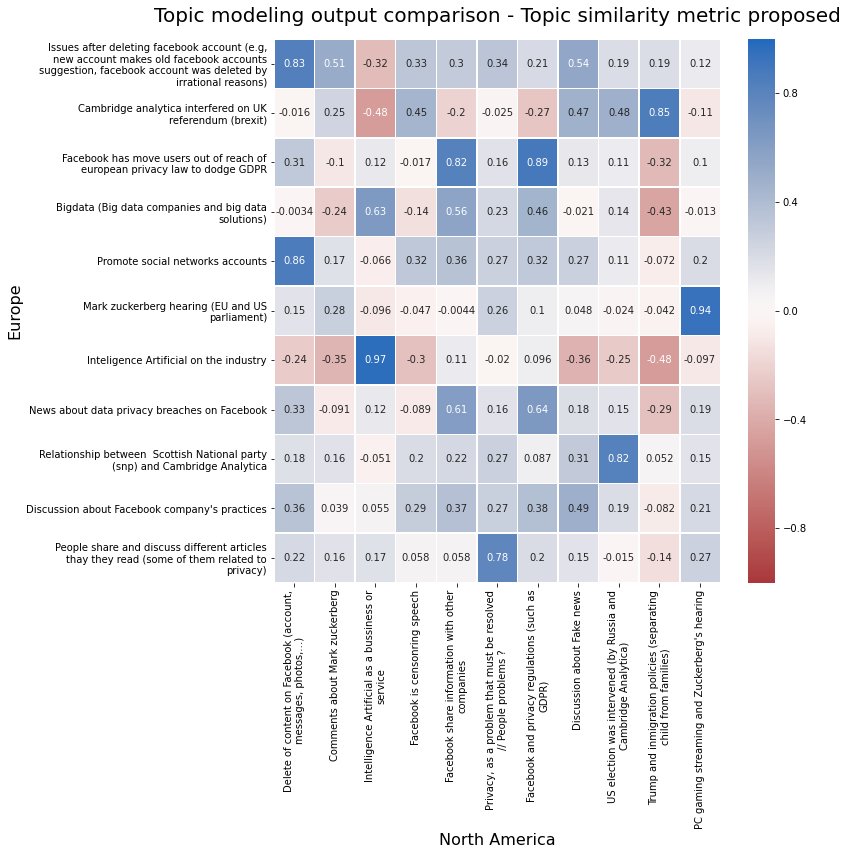

In [20]:

max_width = 45


fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(matrices_dict_test[0.8], annot=True, cmap='vlag_r', vmin=-1, vmax=1, linewidths=.5, ax=ax, xticklabels=names_excel_northamerica, yticklabels=names_excel_europe)
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.set_yticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_yticklabels())
plt.title("Topic modeling output comparison - Topic similarity metric proposed", fontsize = 20, y = 1.02)
plt.xlabel('North America', fontsize=16)
plt.ylabel('Europe', fontsize=16)

#### How topic similarity metric changes according to oemga parameter

In [21]:
def show_confussion_matrix(omega):
    omega = omega/100.0
    max_width = 45
    fig, ax = plt.subplots(figsize=(10,10))     
    sns.heatmap(matrices_dict_test[omega], annot=True, cmap='vlag_r', vmin=-1, vmax=1, linewidths=.5, ax=ax, xticklabels=names_excel_northamerica, yticklabels=names_excel_europe)
    ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
    ax.set_yticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_yticklabels())
    plt.title("Topic similarity metric proposed - Omega: "+str(omega), fontsize = 20, y = 1.02)
    plt.xlabel('North America', fontsize=16)
    plt.ylabel('Europe', fontsize=16)

In [22]:
from ipywidgets import Play
interact(show_confussion_matrix, omega=Play(value=0, min=0, max=100, step=1, interval=200));


interactive(children=(Play(value=0, description='omega', interval=200), Output()), _dom_classes=('widget-inter…

In [27]:
def calculate_difference_topic_similarity_metric(omega):
    omega_old = round(omega/100.0,2)
    omega_new = round(omega_old+0.05,2)
    max_width = 45
    fig, ax = plt.subplots(figsize=(10,10))     
    sns.heatmap(matrices_dict_test[omega_new] - matrices_dict_test[omega_old],  vmin=-2, vmax=2,  annot=True, cmap='vlag_r', linewidths=.5, ax=ax, xticklabels=names_excel_northamerica, yticklabels=names_excel_europe)
    ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
    ax.set_yticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_yticklabels())
    plt.title("Topic similarity metric proposed - Omegas: "+str(omega_new)+"-"+str(omega_old), fontsize = 20, y = 1.02)
    plt.xlabel('North America', fontsize=16)
    plt.ylabel('Europe', fontsize=16)

In [28]:

interact(calculate_difference_topic_similarity_metric, omega=Play(value=0, min=0, max=90, step=5, interval=500));


interactive(children=(Play(value=0, description='omega', interval=500, max=90, step=5), Output()), _dom_classe…

In [25]:
print(np.median(matrices_dict_test[1.0] - matrices_dict_test[0.0]))
print(np.average(matrices_dict_test[1.0] - matrices_dict_test[0.0]))
print(np.std(matrices_dict_test[1.0] - matrices_dict_test[0.0]))

0.029455527663230896
0.035104599142493295
0.09058372007069126


Text(68.99999999999996, 0.5, 'Europe')

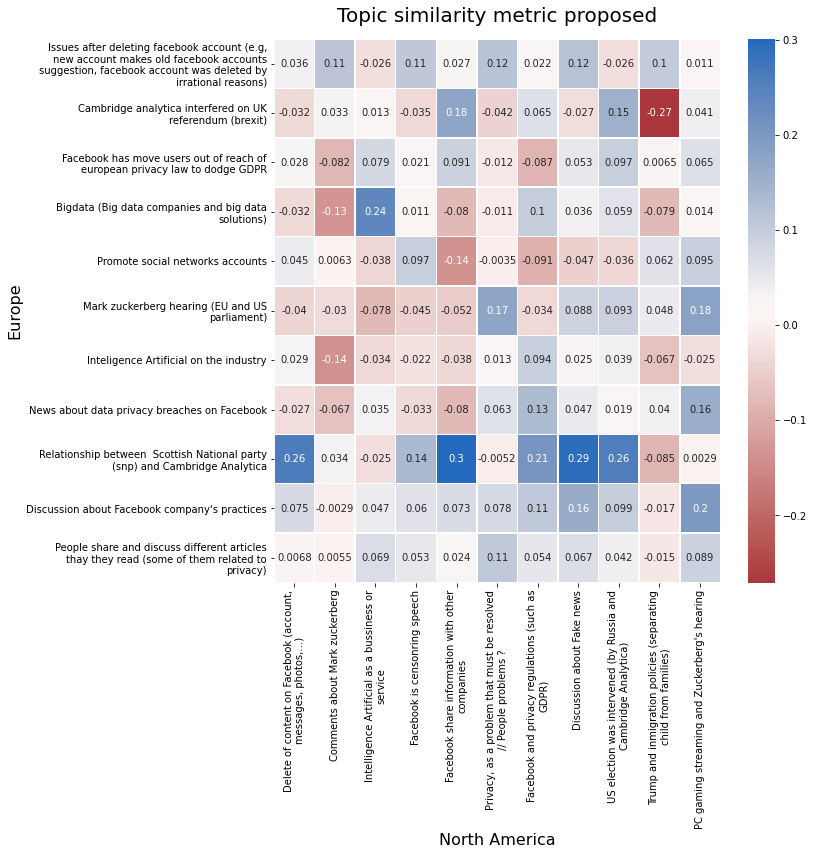

In [26]:
    fig, ax = plt.subplots(figsize=(10,10))     
    sns.heatmap(matrices_dict_test[1.0] - matrices_dict_test[0.0],   annot=True, cmap='vlag_r', linewidths=.5, ax=ax, xticklabels=names_excel_northamerica, yticklabels=names_excel_europe)
    ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
    ax.set_yticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_yticklabels())
    plt.title("Topic similarity metric proposed", fontsize = 20, y = 1.02)
    plt.xlabel('North America', fontsize=16)
    plt.ylabel('Europe', fontsize=16)

### Calculate topic similarity between specific topics

In [70]:
def get_topic_similarity_between_two_topics(topic_id_1, topic_id_2, wordembedding, lda_model_1,most_relevant_documents_1,lda_model_2,most_relevant_documents_2, n_terms, lambda_, topic_order_1, topic_order_2, PreparedData_dict_with_more_info_1, PreparedData_dict_with_more_info_2, topkdocuments):
    #final topic vector = (lambda)topic_keyword_vector + (lambda-1)topic_document_vector
    final_topic_vectors_dict_1 =  get_topic_vectors(wordembedding, lda_model_1,most_relevant_documents_1,  n_terms, lambda_, topic_order_1, PreparedData_dict_with_more_info_1, topkdocuments)
    final_topic_vectors_dict_2 =  get_topic_vectors(wordembedding, lda_model_2,most_relevant_documents_2,  n_terms, lambda_, topic_order_2,  PreparedData_dict_with_more_info_2, topkdocuments)
    topic_i = final_topic_vectors_dict_1[topic_id_1].reshape(1,-1)
    topic_j = final_topic_vectors_dict_2[topic_id_2].reshape(1,-1)
    topic_similarity = cosine_similarity(topic_i,topic_j)
    return topic_similarity

In [72]:
topkdocuments = 20
lambda_ = 0.8 #lambda between keyword vector y most relevant document vector

#topic id according to gensim lda? creo?
topic_id_1 = 0
topic_id_2 = 0
get_topic_similarity_between_two_topics(topic_id_1, topic_id_2, wordembedding, lda_model_collecion_1, most_relevant_documents_collection_1, lda_model_collecion_2, most_relevant_documents_collection_2,topn, lambda_, topic_order_1, topic_order_2, tinfo_collection_1, tinfo_collection_2, topkdocuments)

299     people
264     delete
265       year
266    account
267     friend
Name: Term, dtype: object
60       trump
61       leave
62        vote
64    campaign
63    election
Name: Term, dtype: object
131        privacy
161          datum
132           user
133       personal
136    information
Name: Term, dtype: object
195         big
196    business
229       datum
197     service
199    security
Name: Term, dtype: object
664    facebook
629        page
630      follow
632        find
631     twitter
Name: Term, dtype: object
700    question
701       today
702       watch
703        talk
704        week
Name: Term, dtype: object
768          bigdata
769             late
770               ai
771         analytic
772    machinelearne
Name: Term, dtype: object
481     scandal
451      change
519    facebook
516     company
518        data
Name: Term, dtype: object
414      work
415        ad
416     story
418       pay
417    report
Name: Term, dtype: object
336      social
337      m

array([[0.8317921]], dtype=float32)

In [77]:
topic_id = 0
n_terms = 5
tinfo_collection_1.loc[tinfo_collection_1['Category'] == 'Topic'+str(topic_id+1)].sort_values(by='relevance', ascending=False)[['Term','relevance']][:n_terms]


,Term,relevance
60,trump,-1.05490
61,leave,-1.08682
62,vote,-1.25434
64,campaign,-1.29994
63,election,-1.31698


In [70]:
'''
with open('../data/cambridge_analytica/regional_datasets/files_europe/english_europe_tweets_20190411.csvsent_topics_sorteddf_mallet_ldamodel', 'rb') as f:
    most_relevant_documents_collection_1 = pickle.load(f)
#most_relevant_documents_collection_1 = most_relevant_documents_collection_1[['Topic_Num','Topic_Perc_Contrib','text']]
most_relevant_documents_collection_1.to_csv('borrar_review_delete.csv')
''';